In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics 

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [4]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [5]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
pyber_summary_df = pyber_data_df.groupby(pyber_data_df["city"]).agg({"fare":"mean","ride_id":"count"})
pyber_summary_df = pd.merge(pyber_summary_df, city_data_df, how="left", on=["city", "city"])
pyber_summary_df.rename(columns={"ride_id":"rides", "driver_count":"drivers", "fare":"avg_fares"})

,city,avg_fares,rides,drivers,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
...,...,...,...,...,...
115,West Robert,25.123871,31,39,Urban
116,West Samuelburgh,21.767600,25,73,Urban
117,Williamsonville,31.875000,14,2,Suburban
118,Williamsstad,24.362174,23,59,Urban


In [8]:
pyber_summary_df = pyber_summary_df.rename(columns={"ride_id":"rides", "driver_count":"drivers", "fare":"avg_fares"})

# Create the Urban, Suburban, and Rural city DataFrames.
urban_data = pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]
suburban_data = pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]
rural_data = pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]


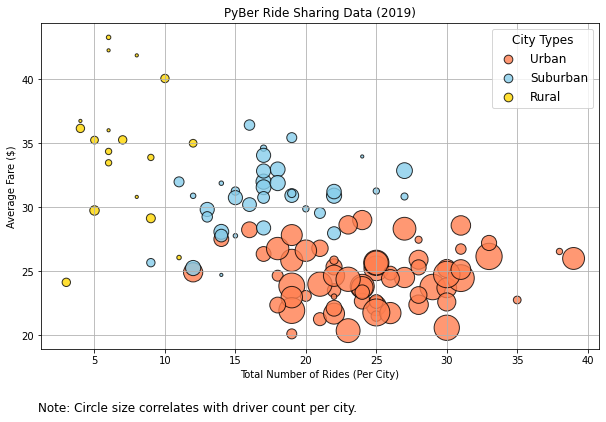

In [11]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_data["rides"], 
           urban_data["avg_fares"], 
           color="coral", 
           s=10*urban_data["drivers"], 
           label="Urban", 
           alpha=0.8,
           edgecolors="black", 
           linewidths=1)  

plt.scatter(suburban_data["rides"], 
           suburban_data["avg_fares"], 
           color="skyblue", 
           s=10*suburban_data["drivers"], 
           label="Suburban", 
           alpha=0.8,
           edgecolors="black", 
           linewidths=1)  

plt.scatter(rural_data["rides"], 
           rural_data["avg_fares"], 
           color="gold", 
           s=10*rural_data["drivers"], 
           label="Rural", 
           alpha=0.8,
           edgecolors="black", 
           linewidths=1)  

plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(1,14, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()

In [61]:
pyber_data_df.loc[pyber_data_df["type"]=="Urban"].describe()
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [35]:
round(pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["rides"].mean(),2),round(pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]["rides"].mean(),2),round(pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["rides"].mean(),2)

(24.62, 17.36, 6.94)

In [36]:
round(pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["rides"].median(),2),round(pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]["rides"].median(),2),round(pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["rides"].median(),2)

(24.0, 17.0, 6.0)

In [53]:
round(pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["rides"].mode(),2),round(pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]["rides"].mode(),2),round(pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["rides"].mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [54]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [63]:
pyber_data_df.groupby("type").agg({"fare":"mean"}) 

,fare
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [68]:

mean_urban_ride_count = np.mean(pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["rides"])
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["rides"])
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

pyber_summary_df.groupby("type").agg({"rides":"median"}) 


The mean for the ride counts for urban trips is 24.62.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


,rides
type,
Rural,6.0
Suburban,17.0
Urban,24.0


In [81]:
mean_urban_fares = np.mean(pyber_data_df.loc[pyber_data_df["type"]=="Urban"]["fare"])
print(f"The mean for the ride counts for urban trips is {mean_urban_fares:.2f}.")

mode_urban_ride_count = sts.mode(pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["rides"])
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["rides"]

The mean for the ride counts for urban trips is 24.53.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


0      18
1      22
6      27
7      27
10     19
       ..
114    16
115    31
116    25
118    23
119    20
Name: rides, Length: 66, dtype: int64

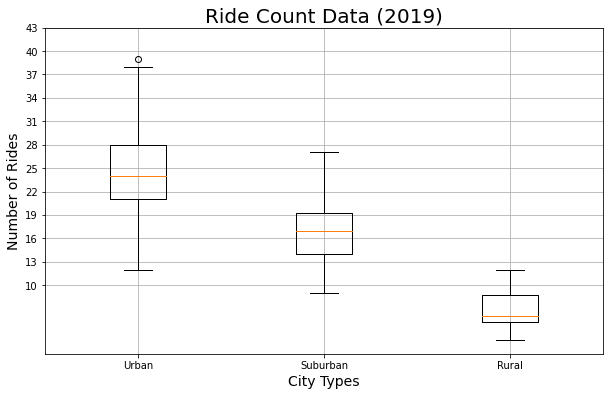

In [90]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [
    pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["rides"],
    pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]["rides"],
    pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["rides"]
]
fig, ax = plt.subplots(figsize=(10, 6))
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(10, 45, step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

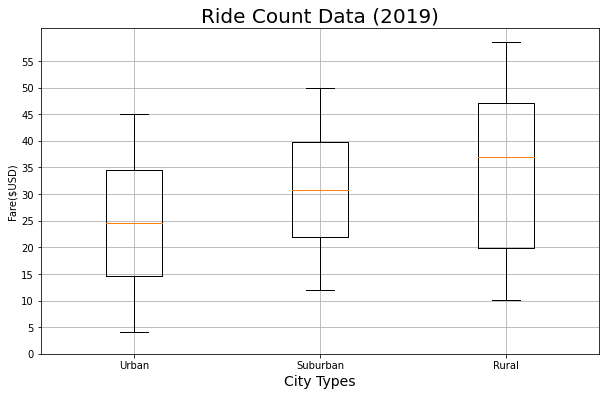

In [94]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [
    pyber_data_df.loc[pyber_data_df["type"]=="Urban"]["fare"],
    pyber_data_df.loc[pyber_data_df["type"]=="Suburban"]["fare"],
    pyber_data_df.loc[pyber_data_df["type"]=="Rural"]["fare"]
]
fig, ax = plt.subplots(figsize=(10, 6))
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

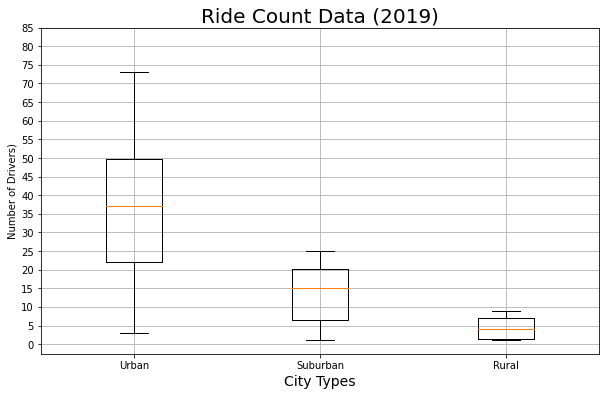

In [98]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [
    pyber_summary_df.loc[pyber_summary_df["type"]=="Urban"]["drivers"],
    pyber_summary_df.loc[pyber_summary_df["type"]=="Suburban"]["drivers"],
    pyber_summary_df.loc[pyber_summary_df["type"]=="Rural"]["drivers"]
]
fig, ax = plt.subplots(figsize=(10, 6))
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers)')
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [95]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [96]:
pyber_summary_df

,city,avg_fares,rides,drivers,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
...,...,...,...,...,...
115,West Robert,25.123871,31,39,Urban
116,West Samuelburgh,21.767600,25,73,Urban
117,Williamsonville,31.875000,14,2,Suburban
118,Williamsstad,24.362174,23,59,Urban
